# Introduction to Regression with Neural Networks in TenorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import random

In [2]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
X = tf.constant(np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]))
y = tf.constant(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]))

## Steps in modelling with TensorFlow
1. create a model - input, output, hidden layers
2. compiling a model - loss function, optimizer, evaluation metrics
3. fitting the model

In [4]:
# 1. Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = "SGD", 
              metrics=['mae'])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 90ms/step - loss: 9.1572 - mae: 9.1572
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 9.0247 - mae: 9.0247
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 8.8922 - mae: 8.8922
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 8.7597 - mae: 8.7597
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 8.6272 - mae: 8.6272


### Prediction

In [5]:
model.predict([17.0])

1/1 [==============================] - 0s 29ms/step


array([[24.118654]], dtype=float32)

## Improving the Model

In [6]:
# Split Data
from sklearn.model_selection import train_test_split
# Turn tensors into NumPy
# Convert the TensorFlow tensors to NumPy arrays
X_np = X.numpy()
y_np = y.numpy()
# Split the data
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Convert the splits back into TensorFlow tensors
X_train = tf.convert_to_tensor(X_train_np)
X_test = tf.convert_to_tensor(X_test_np)
y_train = tf.convert_to_tensor(y_train_np)
y_test = tf.convert_to_tensor(y_test_np)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0001), 
              metrics=['mae'])


model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 431ms/step - loss: 13.7946 - mae: 13.7946
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5023 - mae: 13.5023
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 13.2029 - mae: 13.2029
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.8516 - mae: 12.8516
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 12.4141 - mae: 12.4141
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.8794 - mae: 11.8794
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2130 - mae: 11.2130
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4011 - mae: 10.4011
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4285 - mae: 9.4285
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 8.2723 - mae: 8.2723
Epoch 11/100
1/1 [==============================] - 0s 2ms/st

In [8]:
predictions = model.predict([X_test])

1/1 [==============================] - 0s 28ms/step


### Evaluate the model

#### Visualise
- Data
- The Model
- The training of a model
- The predictions

In [9]:
# More Data
X = tf.range(-100, 100, 4)
y = X + 10

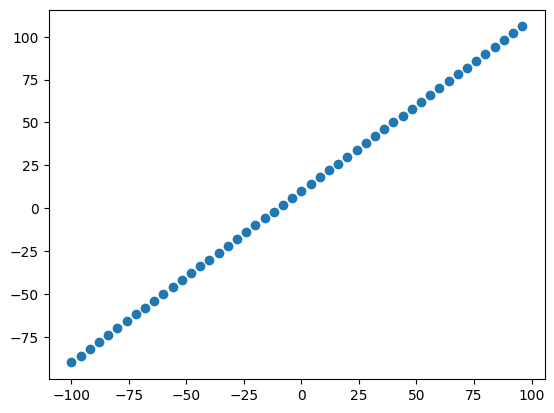

In [10]:
# Visualize the data
plt.scatter(X, y);

In [11]:
# The 3 sets...
len(X)

50

In [12]:
# Split the data into train and test
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

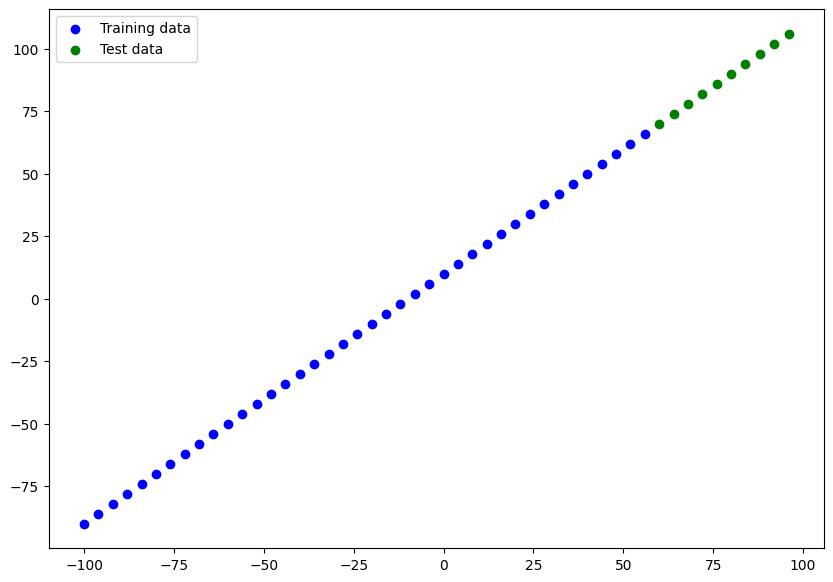

In [13]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.legend();

##### Visualising the model

In [14]:
# Let's create a model that builds automatically
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name='input_layer1', activation='relu'),
    tf.keras.layers.Dense(100, name='input_layer2', activation='relu'),
    tf.keras.layers.Dense(100, name='input_layer3', activation='relu'),
    tf.keras.layers.Dense(1, name='output_layer')
], name= 'model_1')

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
              metrics=['mae'])

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 100)               200       
                                                                 
 input_layer2 (Dense)        (None, 100)               10100     
                                                                 
 input_layer3 (Dense)        (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


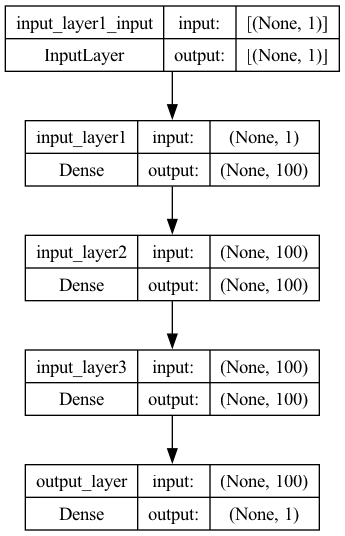

In [16]:
plot_model(model=model, show_shapes=True)

##### Fitting

In [17]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 41.0539 - mae: 41.0539
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 37.1006 - mae: 37.1006
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 33.6170 - mae: 33.6170
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 30.2277 - mae: 30.2277
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 26.9926 - mae: 26.9926
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 23.8239 - mae: 23.8239
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 20.3116 - mae: 20.3116
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 16.2613 - mae: 16.2613
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 12.0974 - mae: 12.0974
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 8.2086 - mae: 8.2086
Epoch 11/100
2/2 [==============================] - 0s 1ms/st

##### Visualise Predictions

In [18]:
y_pred = model.predict(tf.expand_dims(X_test, axis=-1))

1/1 [==============================] - 0s 19ms/step


In [19]:
# Plot predictions against the true values
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels
    :param train_data: 
    :param train_labels: 
    :param test_data: 
    :param test_labels: 
    :param predictions: 
    :return: 
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot models predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend();

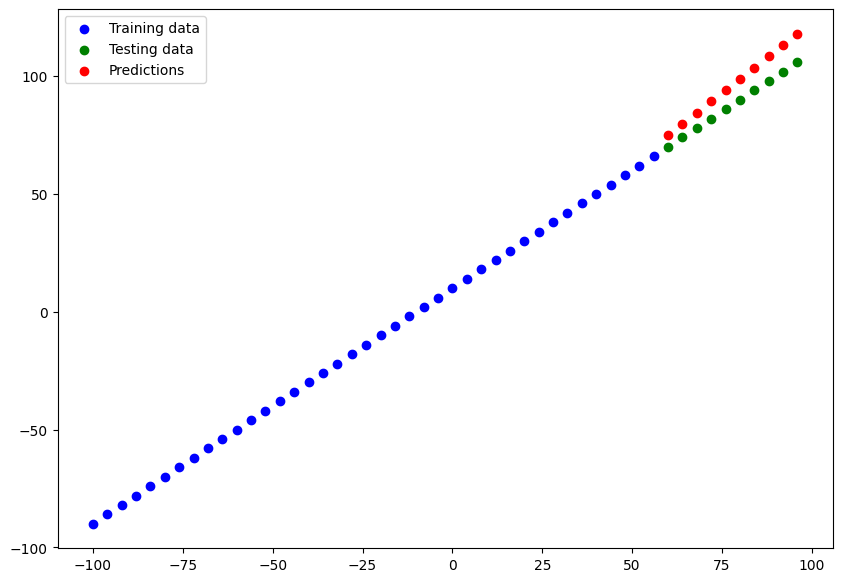

In [20]:
plot_predictions()

### Evaluation Metrics

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert the predictions and true labels to the same format (e.g., NumPy arrays)
y_test_np = y_test.numpy()

# Calculate MSE, MAE, and R-squared
mse = mean_squared_error(y_test_np, y_pred)
mae = mean_absolute_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 77.62528057592571
Mean Absolute Error: 8.52374038696289
R-squared: 0.4119296926066234


In [22]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 54ms/step - loss: 8.5237 - mae: 8.5237


[8.523741722106934, 8.523741722106934]

In [23]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.523741>

In [24]:
# mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=77.62528>

In [25]:
# Make a function
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Run Experiments to improve model

In [38]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 14.2076 - mae: 14.2076
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 8.3682 - mae: 8.3682
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 10.5044 - mae: 10.5044
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 13.0029 - mae: 13.0029
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 12.0551 - mae: 12.0551
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.3244 - mae: 9.3244
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 8.4810 - mae: 8.4810
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0313 - mae: 9.0313
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 18.5385 - mae: 18.5385
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 9.9917 - mae: 9.9917
Epoch 11/100
2/2 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 15ms/step


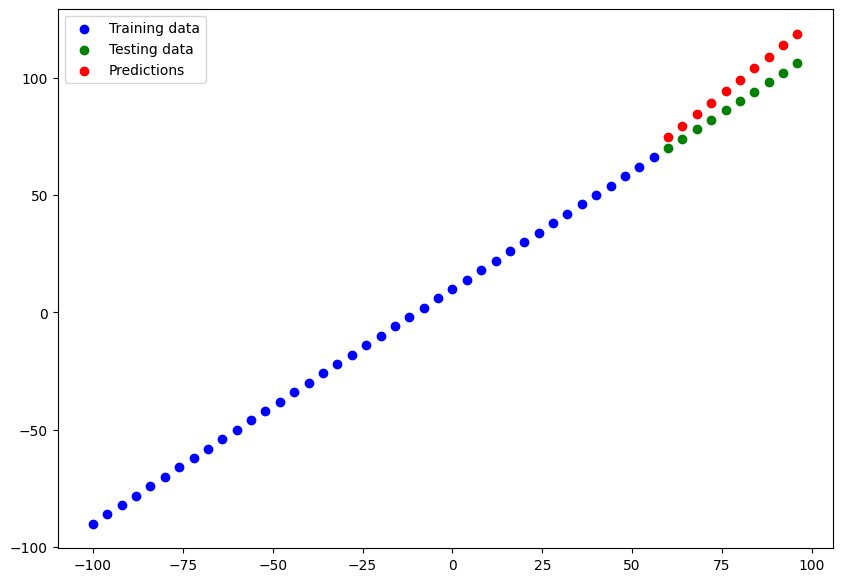

In [39]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [40]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
mae_1 = mae(y_test, y_preds_1).numpy()
mse_1 = mse(y_test, y_preds_1).numpy()
mae_1, mse_1

(8.629547, 80.97771)

In [41]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 33.8817 - mae: 33.8817
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 28.1547 - mae: 28.1547
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 32.1940 - mae: 32.1940
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 13.5831 - mae: 13.5831
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 18.4541 - mae: 18.4541
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.3091 - mae: 9.3091
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 10.3237 - mae: 10.3237
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 11.2590 - mae: 11.2590
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 42.3519 - mae: 42.3519
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 29.5043 - mae: 29.5043
Epoch 11/100
2/2 [==============================] - 0s 1ms/st

1/1 [==============================] - 0s 18ms/step


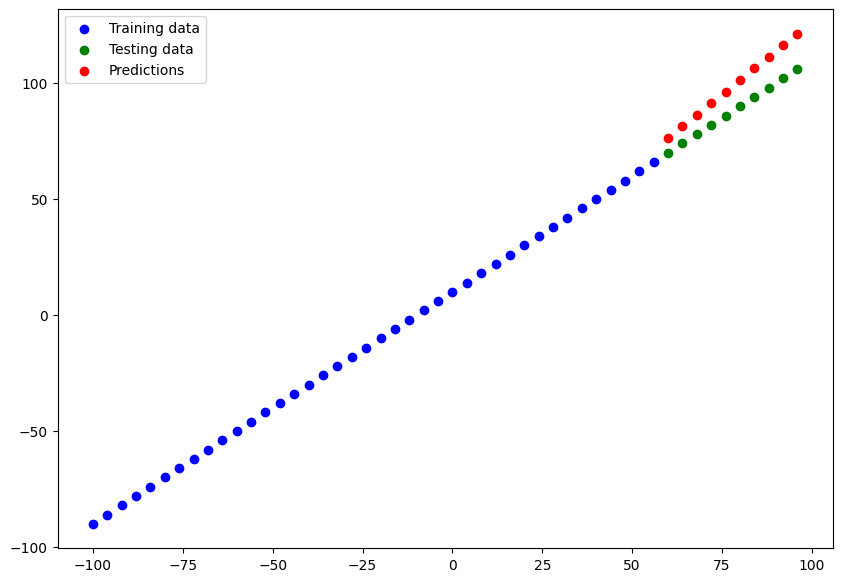

In [42]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [43]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
mae_2 = mae(y_test, y_preds_2).numpy()
mse_2 = mse(y_test, y_preds_2).numpy()
mae_2, mse_2

(10.856744, 125.78694)

In [44]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 33.8817 - mae: 33.8817
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 28.1547 - mae: 28.1547
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 32.1940 - mae: 32.1940
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 13.5831 - mae: 13.5831
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 18.4541 - mae: 18.4541
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 9.3091 - mae: 9.3091
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 10.3237 - mae: 10.3237
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 11.2590 - mae: 11.2590
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 42.3519 - mae: 42.3519
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 29.5043 - mae: 29.5043
Epoch 11/500
2/2 [==============================] - 0s 1ms/st

1/1 [==============================] - 0s 16ms/step


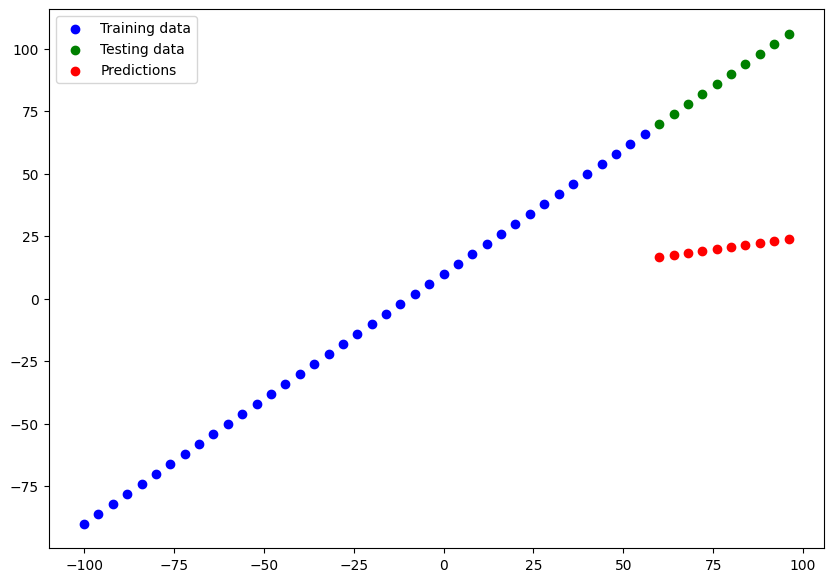

In [45]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [46]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
mae_3 = mae(y_test, y_preds_3).numpy()
mse_3 = mse(y_test, y_preds_3).numpy()
mae_3, mse_3

(67.57417, 4650.265)